# Bussiness case:

###### Definition of Target and Outcome Window:
One of the leading banks would like to predict bad customer while customer applying for loan. This model also called as PD Models (Probability of Default)

# Data Overview:
> Bankloans.csv <BR>
    
The data contains the credit details about credit borrowers: <br>
    
Data Description:
    
age - Age of Customer
    
ed - Eductation level of customer
    
employ: Tenure with current employer (in years)
    
address: Number of years in same address
    
income: Customer Income
    
debtinc: Debt to income ratio
    
creddebt: Credit to Debt ratio
    
othdebt: Other debts
    
default: Customer defaulted in the past (1= defaulted, 0=Never defaulted)

# Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import pandas_profiling
import statsmodels.formula.api as smf
import sklearn.metrics as metrics
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('mode.chained_assignment', None) # Turn off the warnings

# Import the dataset

In [3]:
df = pd.read_csv('bankloans.csv')
df.head()

age  ed  employ  address  income  debtinc   creddebt   othdebt  default
0   41   3      17       12     176      9.3  11.359392  5.008608      1.0
1   27   1      10        6      31     17.3   1.362202  4.000798      0.0
2   40   1      15       14      55      5.5   0.856075  2.168925      0.0
3   41   1      15       14     120      2.9   2.658720  0.821280      0.0
4   24   2       2        0      28     17.3   1.787436  3.056564      1.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [5]:
# Findout missing values

df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

# Pandas Profiling

In [6]:
report = pandas_profiling.ProfileReport(df)
report

# Data Manipulation

In [7]:
df1 = df[df['default'].isnull() == False]
df_new = df[df['default'].isnull() == True]

In [8]:
print(df.shape, df_new.shape)

(850, 9) (150, 9)


> We have divided the data, if the default has missing value, it means the customer is new.

# Data Audit

In [9]:
def summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(), x.std(), x.var(), x.min(),
                      x.quantile(0.1), x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), x.quantile(0.90), x.quantile(0.95),
                      x.quantile(0.99), x.max()], index = ['count', 'missing', 'sum', 'mean', 'median', 'Standard deviation',
                                                            'variance', 'minimum', '10th percentile',
                                                            '25th percentile', '50th percentile', '75th percentile',
                                                           '90th percentile', '95 percentile', '99th percentile', 'maximum'])

round(df1.apply(summary).T,1)

count  missing      sum  mean  median  Standard deviation  variance  \
age       700.0      0.0  24402.0  34.9    34.0                 8.0      64.0   
ed        700.0      0.0   1206.0   1.7     1.0                 0.9       0.9   
employ    700.0      0.0   5872.0   8.4     7.0                 6.7      44.3   
address   700.0      0.0   5795.0   8.3     7.0                 6.8      46.6   
income    700.0      0.0  31921.0  45.6    34.0                36.8    1355.3   
debtinc   700.0      0.0   7182.4  10.3     8.6                 6.8      46.6   
creddebt  700.0      0.0   1087.5   1.6     0.9                 2.1       4.5   
othdebt   700.0      0.0   2140.7   3.1     2.0                 3.3      10.8   
default   700.0      0.0    183.0   0.3     0.0                 0.4       0.2   

          minimum  10th percentile  25th percentile  50th percentile  \
age          20.0             25.0             29.0             34.0   
ed            1.0              1.0              1.0              1.0   
employ        0.0              1.0              3.0              7.0   
address       0.0              1.0              3.0              7.0   
income       14.0             19.0             24.0             34.0   
debtinc       0.4              2.9              5.0              8.6   
creddebt      0.0              0.2              0.4              0.9   
othdebt       0.0              0.6              1.0              2.0   
default       0.0              0.0              0.0              0.0   

          75th percentile  90th percentile  95 percentile  99th percentile  \
age                  40.0             46.0           49.0             53.0   
ed                    2.0              3.0            4.0              4.0   
employ               12.0             18.0           21.0             27.0   
address              12.0             18.0           22.0             26.0   
income               55.0             82.0          113.0            190.3   
debtinc              14.1             19.6           23.8             30.7   
creddebt              1.9              3.6            5.1              9.9   
othdebt               3.9              7.0            9.5             17.2   
default               1.0              1.0            1.0              1.0   

          maximum  
age          56.0  
ed            5.0  
employ       31.0  
address      34.0  
income      446.0  
debtinc      41.3  
creddebt     20.6  
othdebt      27.0  
default       1.0

# Handling Outlier

In [10]:
def outlier(x):
    x = x.clip(upper = x.quantile(0.99))
    x = x.clip(lower = x.quantile(0.01))    
    return x

df1 = df1.apply(outlier)

# Visualization 

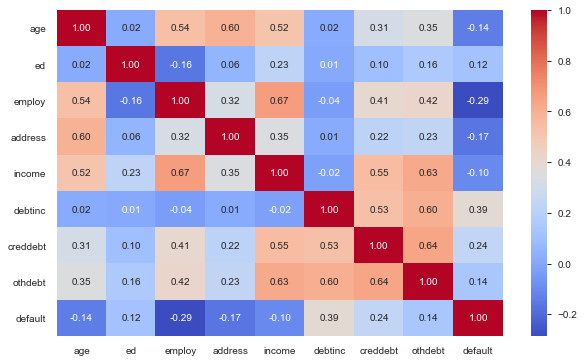

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df1.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.show()

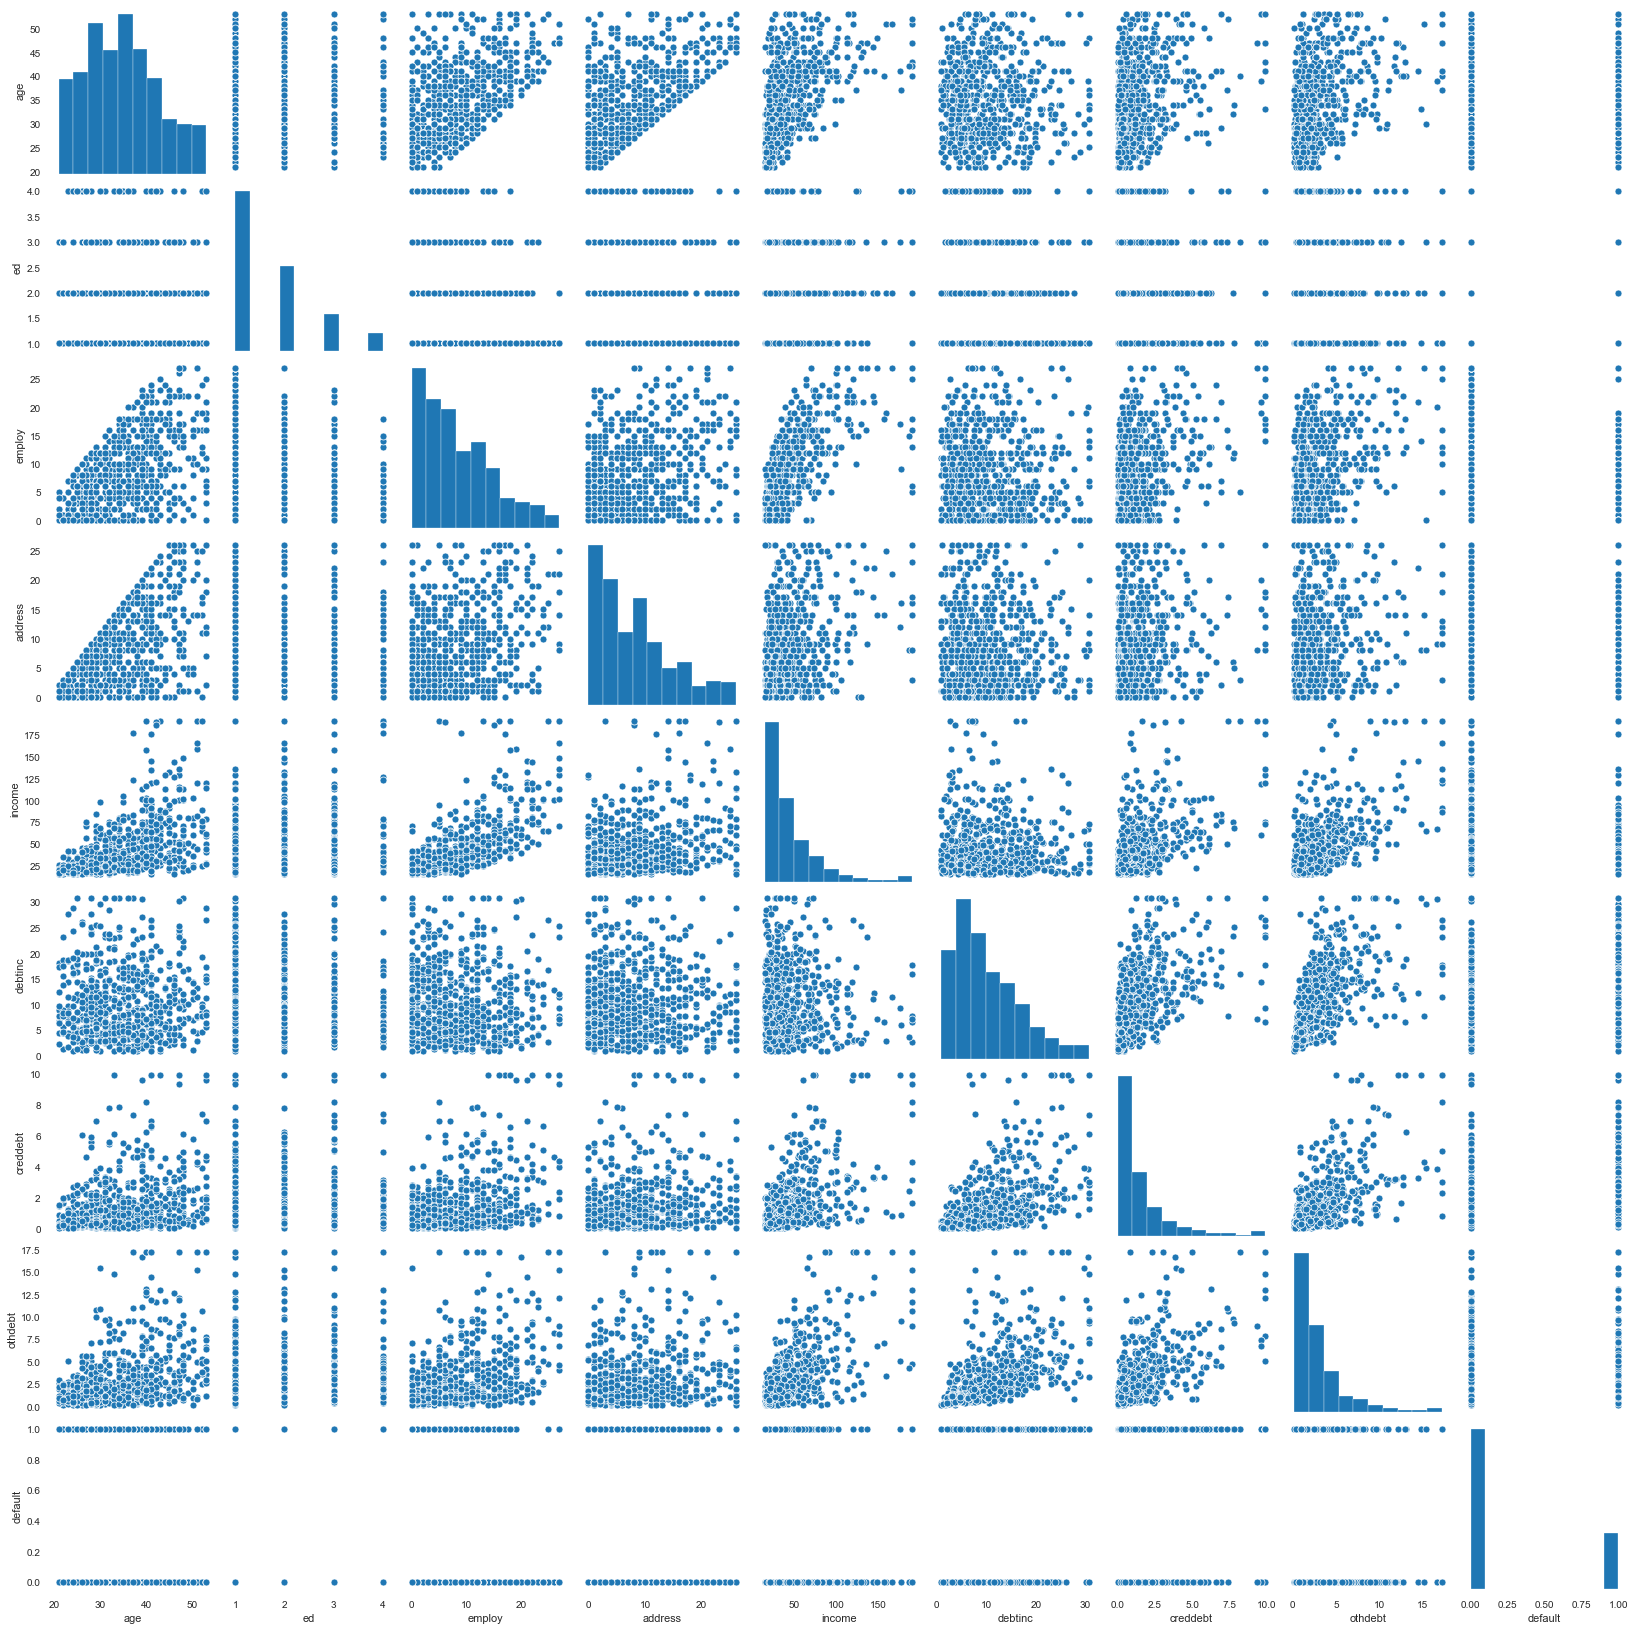

In [12]:
sns.pairplot(df1)
plt.show()

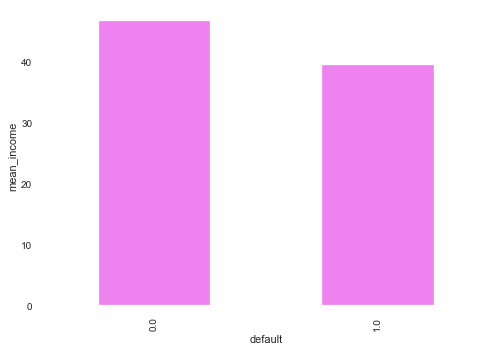

In [13]:
df1.groupby('default')['income'].mean().plot(kind = 'bar', color = 'violet')
plt.ylabel('mean_income')
plt.show()

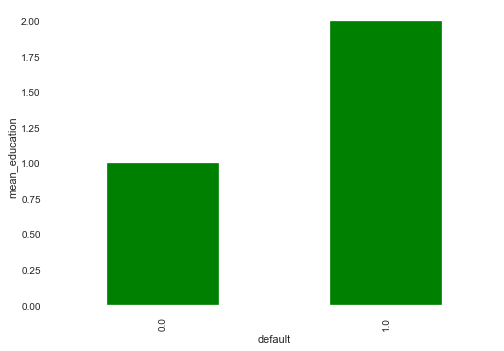

In [14]:
df1.groupby('default')['ed'].median().plot(kind = 'bar', color = 'green')
plt.ylabel('mean_education')
plt.show()

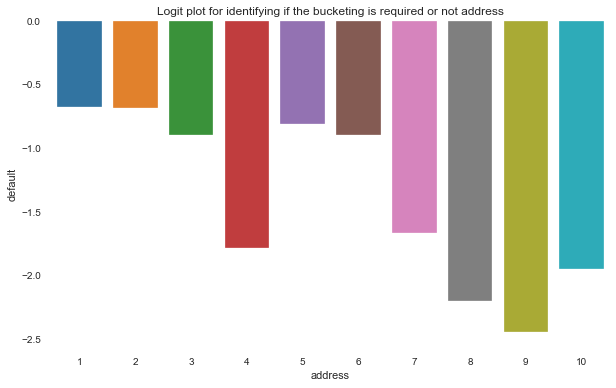

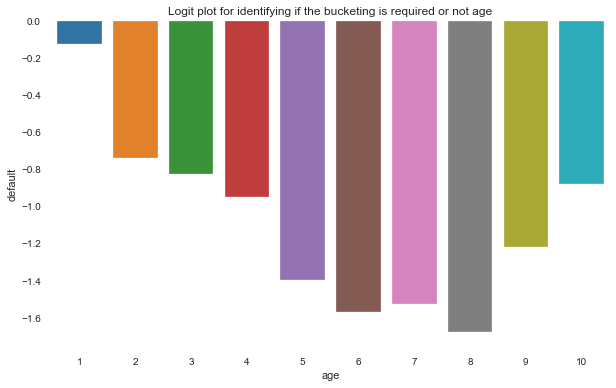

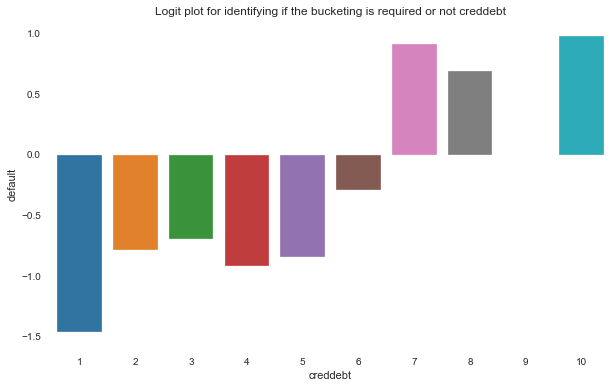

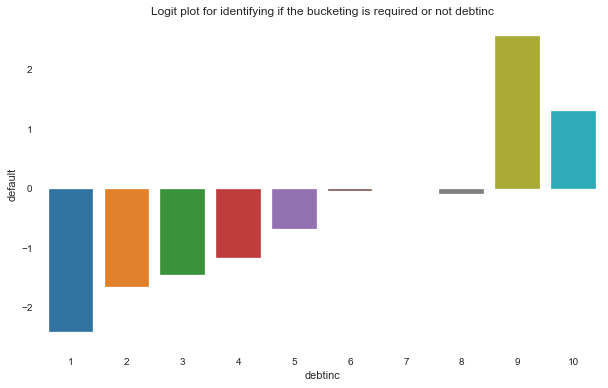

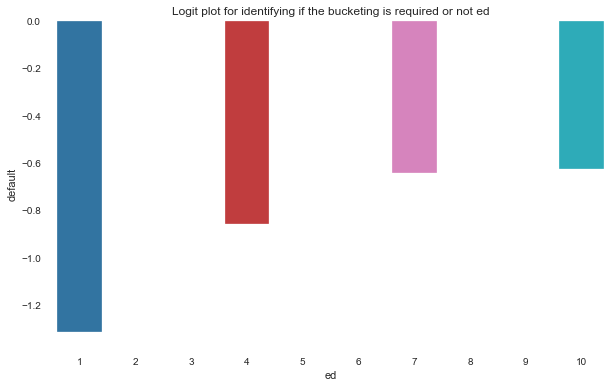

C:\Users\Shyam prasath\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


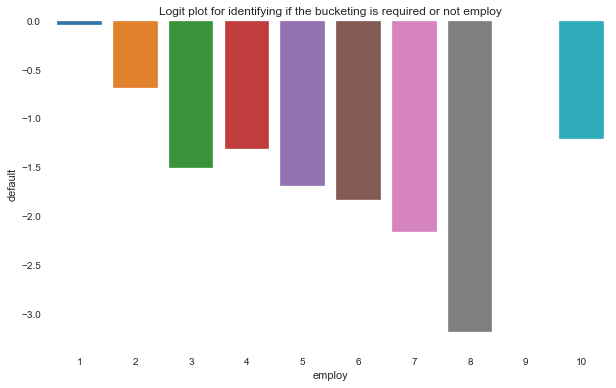

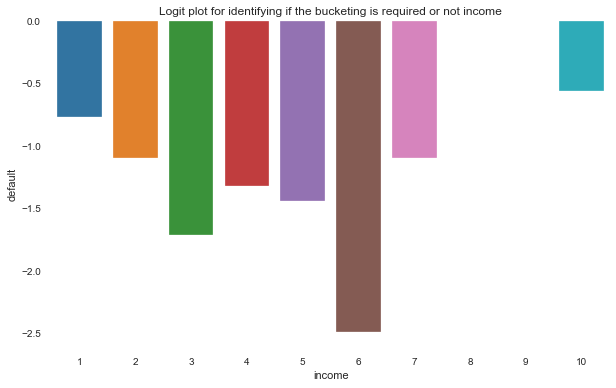

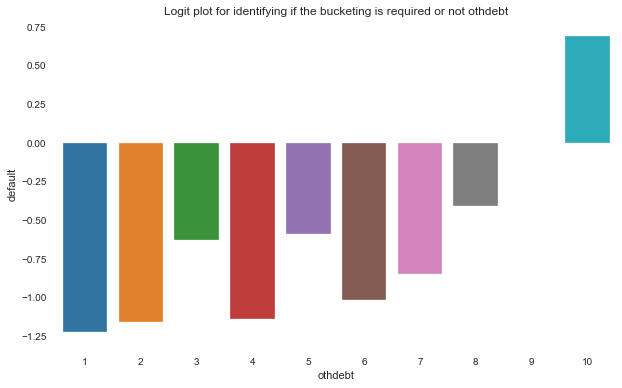

In [15]:
bp = PdfPages('Transformation plot.pdf')

for i in df1.columns.difference(['default']):
    binned = pd.cut(df1[i], bins = 10, labels = list(range(1,11)))
    odds = df1.groupby(binned)['default'].sum() / (df1.groupby(binned)['default'].count() - df1.groupby(binned)['default'].sum())
    log_odds = np.log(odds)
    fig,axes = plt.subplots(figsize = (10,6))
    sns.barplot(x = log_odds.index, y = log_odds)
    plt.title('Logit plot for identifying if the bucketing is required or not' + ' '+ str(i))
    plt.show()
    bp.savefig(fig)

bp.close()

# coefficient of variance

In [16]:
cv = np.mean(df1)/np.std(df1)
cv

age         4.383824
ed          1.893985
employ      1.273932
address     1.227371
income      1.405065
debtinc     1.530862
creddebt    0.838667
othdebt     0.972413
default     0.594950
dtype: float64

# Quick model

In [17]:
formula = 'default~' + '+'.join(df1.columns.difference(['default']))

In [18]:
model = smf.logit(formula = formula, data = df1).fit()

Optimization terminated successfully.
         Current function value: 0.399363
         Iterations 7


In [19]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  700
Model:                          Logit   Df Residuals:                      691
Method:                           MLE   Df Model:                            8
Date:                Sat, 04 Jul 2020   Pseudo R-squ.:                  0.3049
Time:                        14:26:19   Log-Likelihood:                -279.55
converged:                       True   LL-Null:                       -402.18
Covariance Type:            nonrobust   LLR p-value:                 1.744e-48
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4993      0.642     -2.335      0.020      -2.758      -0.241
address       -0.1030      0.023     -4.462      0.000      -0.148      -0.058
age            0.0324      0.018      1.851      0.0

In [20]:
result = pd.DataFrame({'Actual': df1['default'], 'prob': model.predict()})

In [21]:
# Find cutoff value

cutoff = np.mean(df1.default)
cutoff

0.26142857142857145

In [22]:
result['predicted'] = np.where(result['prob']>=cutoff, 1, 0)

In [23]:
print(metrics.classification_report(result.Actual, result.predicted))

              precision    recall  f1-score   support

         0.0       0.91      0.74      0.82       517
         1.0       0.52      0.79      0.62       183

    accuracy                           0.75       700
   macro avg       0.71      0.76      0.72       700
weighted avg       0.81      0.75      0.77       700



# Feature Engineering

## Weight of Evidence and Information value(IV)

In [24]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'val': val,
            'All': dataset[dataset[feature]==val].count()[feature],
            'Good': dataset[(dataset[feature]== val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature]== val) & (dataset[target] == 1)].count()[feature]
                    })
    dset = pd.DataFrame(lst)
    dset['Dist_Good'] = dset['Good']/dset['Good'].sum()
    dset['Dist_Bad'] = dset['Bad']/dset['Bad'].sum()
    dset['WOE'] = np.log(dset['Dist_Good']/dset['Dist_Bad'])
    dset = dset.replace({'WOE': {np.inf:0, -np.inf:0}})
    dset['IV'] = dset['Dist_Good'] - dset['Dist_Bad'] * dset['WOE']
    iv = dset['IV'].sum()
    dset = dset.sort_values(by = 'WOE')
    return dset, iv
    

In [25]:
for col in df1.columns:
    if col == 'default':
        continue
    else:
        print('WOE and IV for column : {}'.format(col))
        df, iv = calculate_woe_iv(df1, col, 'default')
        print('IV score : {:.2f}'.format(iv))
        print('')

WOE and IV for column : age
IV score : 1.22

WOE and IV for column : ed
IV score : 1.04

WOE and IV for column : employ
IV score : 1.37

WOE and IV for column : address
IV score : 1.25

WOE and IV for column : income


C:\Users\Shyam prasath\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


IV score : 1.41

WOE and IV for column : debtinc
IV score : 1.62

WOE and IV for column : creddebt
IV score : 1.01

WOE and IV for column : othdebt
IV score : 1.06



# Somerce'D 

In [26]:
gini_df = pd.DataFrame()

for i in df1.columns.difference(['default']):
    logreg = smf.logit(formula = str('default ~')+ str(i), data = df1).fit()
    gini = 2*metrics.roc_auc_score(df1['default'], logreg.predict())-1
    temp = pd.DataFrame([i, gini]).T
    temp.columns = ['Variable Name', 'SomersD']
    gini_df = pd.concat([gini_df, temp], axis = 0)

Optimization terminated successfully.
         Current function value: 0.559856
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.564673
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.548956
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.501389
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.567774
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.527166
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.569055
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.565619
         Iterations 5


In [27]:
gini_df.sort_values(by = 'SomersD', ascending=False)

Variable Name   SomersD
0       debtinc  0.470506
0        employ  0.409138
0      creddebt  0.272378
0       address  0.222384
0           age  0.206329
0        income  0.200273
0       othdebt  0.173806
0            ed  0.148302

# Recrusive feature engineering (RFE)

In [28]:
feature = df1[df1.columns.difference(['default'])]
target = df1['default']

In [29]:
rfe = RFE(RandomForestClassifier(), 5).fit(feature, target)

In [30]:
feature.columns[rfe.get_support()]

Index(['age', 'creddebt', 'debtinc', 'employ', 'othdebt'], dtype='object')

# Select KBest

In [31]:
skb = SelectKBest(f_classif, 5).fit(feature, target)

In [32]:
feature.columns[skb.get_support()]

Index(['address', 'creddebt', 'debtinc', 'employ', 'othdebt'], dtype='object')

### Final list 

In [33]:
x = ['age',
    'creddebt',
     'debtinc',
     'employ',
     'othdebt',
     'address'
    ]
feature = feature[x]

# VIF 

In [34]:
vif = pd.DataFrame()
vif['vif_factor'] = [variance_inflation_factor(feature.values,i) for i in range(feature.shape[1])]
vif['feature'] = feature.columns

In [35]:
vif

vif_factor   feature
0    9.467222       age
1    3.385447  creddebt
2    6.052830   debtinc
3    4.898274    employ
4    4.601191   othdebt
5    3.556879   address

# Stats Model

### Train Test Split

In [36]:
stats_data = pd.concat([feature, target], axis = 1)

In [37]:
train, test = train_test_split(stats_data, test_size = 0.3, random_state = 123)

In [38]:
formula = 'default~'+ '+'.join(stats_data.columns.difference(['default']))
formula

'default~address+age+creddebt+debtinc+employ+othdebt'

In [39]:
stats_model = smf.logit(formula = formula, data = stats_data).fit()

Optimization terminated successfully.
         Current function value: 0.399895
         Iterations 7


In [40]:
print(stats_model.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  700
Model:                          Logit   Df Residuals:                      693
Method:                           MLE   Df Model:                            6
Date:                Sat, 04 Jul 2020   Pseudo R-squ.:                  0.3040
Time:                        14:26:28   Log-Likelihood:                -279.93
converged:                       True   LL-Null:                       -402.18
Covariance Type:            nonrobust   LLR p-value:                 6.103e-50
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5734      0.526     -2.991      0.003      -2.604      -0.542
address       -0.1032      0.023     -4.482      0.000      -0.148      -0.058
age            0.0304      0.017      1.752      0.0

> Drop the variable having high pvalue and rebuilt the model

In [41]:
formula = 'default~'+ '+'.join(stats_data.columns.difference(['default', 'othdebt', 'age']))
formula

'default~address+creddebt+debtinc+employ'

In [42]:
stats_model = smf.logit(formula = formula, data = stats_data).fit()

Optimization terminated successfully.
         Current function value: 0.402616
         Iterations 7


In [43]:
print(stats_model.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  700
Model:                          Logit   Df Residuals:                      695
Method:                           MLE   Df Model:                            4
Date:                Sat, 04 Jul 2020   Pseudo R-squ.:                  0.2992
Time:                        14:26:28   Log-Likelihood:                -281.83
converged:                       True   LL-Null:                       -402.18
Covariance Type:            nonrobust   LLR p-value:                 6.551e-51
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8378      0.251     -3.341      0.001      -1.329      -0.346
address       -0.0807      0.020     -4.120      0.000      -0.119      -0.042
creddebt       0.6237      0.088      7.057      0.0

# Predict the values

In [44]:
train['train_prob'] = stats_model.predict(train)
train

age  creddebt  debtinc  employ    othdebt  address  default  train_prob
404  34.0  2.099636   15.400    18.0   3.136364     10.0      0.0    0.034952
63   33.0  2.159850    7.000     4.0   1.690150      9.0      0.0    0.360395
34   25.0  0.077140    2.900     8.0   0.937860      1.0      0.0    0.073529
33   25.0  1.018656   14.400     8.0   2.869344      4.0      0.0    0.230689
583  37.0  7.320000   30.701    16.0  10.980000     14.0      1.0    0.802511
..    ...       ...      ...     ...        ...      ...      ...         ...
98   29.0  0.681093    6.300     4.0   0.515907      9.0      0.0    0.174253
322  41.0  0.431200    1.600    16.0   0.352800     22.0      0.0    0.002400
382  39.0  4.003840   16.000     2.0   3.356160     12.0      1.0    0.829543
365  32.0  0.428640    1.900     3.0   0.464360     13.0      0.0    0.102150
510  24.0  2.172816   19.100     3.0   2.411184      1.0      0.0    0.794838

[490 rows x 8 columns]

In [45]:
test['test_prob'] = pd.DataFrame(stats_model.predict(test))
test

age  creddebt  debtinc  employ    othdebt  address  default  test_prob
57   39.0  1.061496      2.4    16.0   0.594504     13.0      0.0   0.007827
478  51.0  0.820870     11.5    27.0  17.184744     21.0      0.0   0.000560
597  32.0  2.594144     14.8     5.0   1.549856      0.0      1.0   0.700969
689  30.0  0.227268     10.7     4.0   1.698732      2.0      0.0   0.289568
647  27.0  0.882833      4.9     6.0   1.224167      6.0      0.0   0.143612
..    ...       ...      ...     ...        ...      ...      ...        ...
41   34.0  1.807760      8.0    17.0   2.912240      3.0      0.0   0.034564
617  29.0  0.449820      5.1     6.0   0.468180      7.0      1.0   0.107243
226  29.0  3.703260     18.1    10.0   4.260740      8.0      0.0   0.496464
26   45.0  0.707319      6.7     9.0   3.915681     26.0      0.0   0.016766
348  29.0  0.146640      2.6     3.0   0.243360      8.0      0.0   0.131689

[210 rows x 8 columns]

# Calculate AUC score (Area under Curve)

In [46]:
train_auc = metrics.roc_auc_score(train.default, train['train_prob'])
train_auc

0.8562510580667005

In [47]:
test_auc = metrics.roc_auc_score(test.default, test['test_prob'])
test_auc

0.8420273769885313

# Calculate GINI

In [48]:
train_gini = 2*metrics.roc_auc_score(train.default, train['train_prob'])-1
train_gini

0.7125021161334011

In [49]:
test_gini = 2*metrics.roc_auc_score(test.default, test['test_prob'])-1
test_gini

0.6840547539770625

# Finding Best cutt-off

### %in 1's in y:

In [50]:
np.mean(train.default)

0.2693877551020408

### Higher sensitivity + specificity

In [51]:
temp = train.copy()
roc_df = pd.DataFrame()


for cutoff in np.linspace(0,1):
    temp['y_pred'] = np.where(train['train_prob'] > cutoff, 1, 0)
    temp['TP'] = np.where((train['default'] == 1) & (temp['y_pred'] == 1), 1, 0)
    temp['TN'] = np.where((train['default'] == 0) & (temp['y_pred'] == 0), 1, 0)
    temp['FP'] = np.where((train['default'] == 0) & (temp['y_pred'] == 1), 1, 0)
    temp['FN'] = np.where((train['default'] == 1) & (temp['y_pred'] == 0), 1, 0)
    sensitivity = temp['TP'].sum()/(temp['TP'].sum() + temp['FN'].sum())
    specificity = temp['TN'].sum()/(temp['TN'].sum() + temp['FP'].sum())
    accuracy = (temp['TP'].sum() + temp['TN'].sum())/(temp['y_pred'].count())
    temp_df = pd.DataFrame([cutoff, sensitivity, specificity, accuracy]).T
    temp_df.columns = ['cutoff', 'sensitivity', 'specificity', 'accuracy']
    roc_df = pd.concat([roc_df, temp_df], axis = 0)

In [52]:
roc_df

cutoff  sensitivity  specificity  accuracy
0  0.000000     1.000000     0.000000  0.269388
0  0.020408     1.000000     0.189944  0.408163
0  0.040816     1.000000     0.301676  0.489796
0  0.061224     0.969697     0.379888  0.538776
0  0.081633     0.946970     0.427374  0.567347
0  0.102041     0.931818     0.477654  0.600000
0  0.122449     0.931818     0.530726  0.638776
0  0.142857     0.924242     0.567039  0.663265
0  0.163265     0.916667     0.603352  0.687755
0  0.183673     0.909091     0.636872  0.710204
0  0.204082     0.863636     0.664804  0.718367
0  0.224490     0.833333     0.703911  0.738776
0  0.244898     0.803030     0.729050  0.748980
0  0.265306     0.803030     0.745810  0.761224
0  0.285714     0.765152     0.784916  0.779592
0  0.306122     0.742424     0.796089  0.781633
0  0.326531     0.712121     0.804469  0.779592
0  0.346939     0.689394     0.821229  0.785714
0  0.367347     0.666667     0.843575  0.795918
0  0.387755     0.643939     0.851955  0.795918
0  0.408163     0.636364     0.860335  0.800000
0  0.428571     0.613636     0.868715  0.800000
0  0.448980     0.590909     0.885475  0.806122
0  0.469388     0.537879     0.907821  0.808163
0  0.489796     0.537879     0.913408  0.812245
0  0.510204     0.515152     0.918994  0.810204
0  0.530612     0.484848     0.924581  0.806122
0  0.551020     0.469697     0.935754  0.810204
0  0.571429     0.431818     0.949721  0.810204
0  0.591837     0.416667     0.958101  0.812245
0  0.612245     0.356061     0.966480  0.802041
0  0.632653     0.356061     0.966480  0.802041
0  0.653061     0.333333     0.966480  0.795918
0  0.673469     0.295455     0.974860  0.791837
0  0.693878     0.295455     0.977654  0.793878
0  0.714286     0.250000     0.980447  0.783673
0  0.734694     0.204545     0.983240  0.773469
0  0.755102     0.166667     0.988827  0.767347
0  0.775510     0.151515     0.991620  0.765306
0  0.795918     0.128788     0.994413  0.761224
0  0.816327     0.121212     0.994413  0.759184
0  0.836735     0.113636     0.997207  0.759184
0  0.857143     0.098485     0.997207  0.755102
0  0.877551     0.098485     1.000000  0.757143
0  0.897959     0.083333     1.000000  0.753061
0  0.918367     0.075758     1.000000  0.751020
0  0.938776     0.060606     1.000000  0.746939
0  0.959184     0.030303     1.000000  0.738776
0  0.979592     0.022727     1.000000  0.736735
0  1.000000     0.000000     1.000000  0.730612

In [53]:
roc_df['sensitivity+specificity'] = roc_df['sensitivity'] + roc_df['specificity']
roc_df.sort_values(by = 'accuracy', ascending=False).head(1)

cutoff  sensitivity  specificity  accuracy  sensitivity+specificity
0  0.591837     0.416667     0.958101  0.812245                 1.374767

> We Usually take high sensitivity+specificity as cuttoff, but now we have taken accuracy

In [54]:
train['default_pred'] = np.where(train['train_prob']> 0.591837, 1,0)
test['default_pred'] = np.where(test['test_prob']> 0.591837, 1,0)

In [55]:
print(metrics.classification_report(train['default'], train['default_pred']))

              precision    recall  f1-score   support

         0.0       0.82      0.96      0.88       358
         1.0       0.79      0.42      0.54       132

    accuracy                           0.81       490
   macro avg       0.80      0.69      0.71       490
weighted avg       0.81      0.81      0.79       490



In [56]:
print(metrics.classification_report(test['default'], test['default_pred']))

              precision    recall  f1-score   support

         0.0       0.83      0.97      0.89       159
         1.0       0.79      0.37      0.51        51

    accuracy                           0.82       210
   macro avg       0.81      0.67      0.70       210
weighted avg       0.82      0.82      0.80       210



In [57]:
train

age  creddebt  debtinc  employ    othdebt  address  default  train_prob  \
404  34.0  2.099636   15.400    18.0   3.136364     10.0      0.0    0.034952   
63   33.0  2.159850    7.000     4.0   1.690150      9.0      0.0    0.360395   
34   25.0  0.077140    2.900     8.0   0.937860      1.0      0.0    0.073529   
33   25.0  1.018656   14.400     8.0   2.869344      4.0      0.0    0.230689   
583  37.0  7.320000   30.701    16.0  10.980000     14.0      1.0    0.802511   
..    ...       ...      ...     ...        ...      ...      ...         ...   
98   29.0  0.681093    6.300     4.0   0.515907      9.0      0.0    0.174253   
322  41.0  0.431200    1.600    16.0   0.352800     22.0      0.0    0.002400   
382  39.0  4.003840   16.000     2.0   3.356160     12.0      1.0    0.829543   
365  32.0  0.428640    1.900     3.0   0.464360     13.0      0.0    0.102150   
510  24.0  2.172816   19.100     3.0   2.411184      1.0      0.0    0.794838   

     default_pred  
404             0  
63              0  
34              0  
33              0  
583             1  
..            ...  
98              0  
322             0  
382             1  
365             0  
510             1  

[490 rows x 9 columns]

# Decile Analysis

### For Train

In [58]:
train['Deciles'] = pd.qcut(train['train_prob'], 10, labels = False)
test['Deciles'] = pd.qcut(test['test_prob'], 10, labels = False)

In [59]:
decile_train = train.groupby(['Deciles']).agg(min_prob = ('train_prob', 'min'),
                             max_prob = ('train_prob', 'max'),
                             no_bads =  ('default', 'sum'),
                             total =    ('default', 'count'))

decile_train['no_goods'] = decile_train['total'] - decile_train['no_bads']
decile_train

min_prob  max_prob  no_bads  total  no_goods
Deciles                                              
0        0.001048  0.011176      0.0     49      49.0
1        0.011485  0.035120      0.0     49      49.0
2        0.035935  0.070398      4.0     49      45.0
3        0.070416  0.117191      5.0     49      44.0
4        0.120846  0.189725      3.0     49      46.0
5        0.190032  0.265784     15.0     49      34.0
6        0.266254  0.359145     17.0     49      32.0
7        0.360395  0.498162     20.0     49      29.0
8        0.509674  0.670337     29.0     49      20.0
9        0.671088  0.985046     39.0     49      10.0

In [60]:
decile_train = decile_train.iloc[:,[0,1,2,4,3]]
decile_train.sort_values(by = ['Deciles'], ascending = False)

min_prob  max_prob  no_bads  no_goods  total
Deciles                                              
9        0.671088  0.985046     39.0      10.0     49
8        0.509674  0.670337     29.0      20.0     49
7        0.360395  0.498162     20.0      29.0     49
6        0.266254  0.359145     17.0      32.0     49
5        0.190032  0.265784     15.0      34.0     49
4        0.120846  0.189725      3.0      46.0     49
3        0.070416  0.117191      5.0      44.0     49
2        0.035935  0.070398      4.0      45.0     49
1        0.011485  0.035120      0.0      49.0     49
0        0.001048  0.011176      0.0      49.0     49

### For Test

In [61]:
decile_test = test.groupby(['Deciles']).agg(min_prob = ('test_prob', 'min'),
                             max_prob = ('test_prob', 'max'),
                             no_bads =  ('default', 'sum'),
                             total =    ('default', 'count'))

decile_test['no_goods'] = decile_test['total'] - decile_test['no_bads']
decile_test

min_prob  max_prob  no_bads  total  no_goods
Deciles                                              
0        0.000560  0.008858      0.0     21      21.0
1        0.010276  0.034564      1.0     21      20.0
2        0.034756  0.070690      2.0     21      19.0
3        0.073193  0.127822      1.0     21      20.0
4        0.128109  0.168990      3.0     21      18.0
5        0.171810  0.236095      2.0     21      19.0
6        0.237422  0.328331      6.0     21      15.0
7        0.335775  0.434026      9.0     21      12.0
8        0.435241  0.613058     11.0     21      10.0
9        0.630089  0.970414     16.0     21       5.0

In [62]:
decile_test = decile_test.iloc[:,[0,1,2,4,3]]
decile_test.sort_values(by = ['Deciles'], ascending = False)

min_prob  max_prob  no_bads  no_goods  total
Deciles                                              
9        0.630089  0.970414     16.0       5.0     21
8        0.435241  0.613058     11.0      10.0     21
7        0.335775  0.434026      9.0      12.0     21
6        0.237422  0.328331      6.0      15.0     21
5        0.171810  0.236095      2.0      19.0     21
4        0.128109  0.168990      3.0      18.0     21
3        0.073193  0.127822      1.0      20.0     21
2        0.034756  0.070690      2.0      19.0     21
1        0.010276  0.034564      1.0      20.0     21
0        0.000560  0.008858      0.0      21.0     21

> The Model is predicting perfectly and the model validation is successful

# Predicting for new customers

In [63]:
df_new.head()

age  ed  employ  address  income  debtinc  creddebt   othdebt  default
700   36   1      16       13      32     10.9  0.544128  2.943872      NaN
701   50   1       6       27      21     12.9  1.316574  1.392426      NaN
702   40   1       9        9      33     17.0  4.880700  0.729300      NaN
703   31   1       5        7      23      2.0  0.046000  0.414000      NaN
704   29   1       4        0      24      7.8  0.866736  1.005264      NaN

In [64]:
df_new['prob'] = stats_model.predict(df_new)

In [65]:
df_new['default_pred'] = np.where(df_new['prob']>0.591837,1,0)

In [66]:
df_new['default_pred'].value_counts()

0    129
1     21
Name: default_pred, dtype: int64

> So we know that 21 customer is bad

# Finding the credit score for the new customer

In [67]:
df_new['credit_score'] = 1000 - (df_new['prob']*1000)
df_new

age  ed  employ  address  income  debtinc  creddebt   othdebt  default  \
700   36   1      16       13      32     10.9  0.544128  2.943872      NaN   
701   50   1       6       27      21     12.9  1.316574  1.392426      NaN   
702   40   1       9        9      33     17.0  4.880700  0.729300      NaN   
703   31   1       5        7      23      2.0  0.046000  0.414000      NaN   
704   29   1       4        0      24      7.8  0.866736  1.005264      NaN   
..   ...  ..     ...      ...     ...      ...       ...       ...      ...   
845   34   1      12       15      32      2.7  0.239328  0.624672      NaN   
846   32   2      12       11     116      5.7  4.026708  2.585292      NaN   
847   48   1      13       11      38     10.8  0.722304  3.381696      NaN   
848   35   2       1       11      24      7.8  0.417456  1.454544      NaN   
849   37   1      20       13      41     12.9  0.899130  4.389870      NaN   

         prob  default_pred  credit_score  
700  0.011687             0    988.313385  
701  0.074136             0    925.863938  
702  0.686604             1    313.396356  
703  0.083370             0    916.630019  
704  0.357670             0    642.329526  
..        ...           ...           ...  
845  0.010613             0    989.386817  
846  0.168889             0    831.110925  
847  0.030567             0    969.433493  
848  0.261850             0    738.150295  
849  0.006688             0    993.312223  

[150 rows x 12 columns]